In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score, confusion_matrix

/Users/shashanksingh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/shashanksingh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("final_dataset.csv")
df.head()

,Trip_ID,Date,City,Vehicle_Type,Fuel_Type,Route,Distance_km,Load_Weight_kg,Total_Fuel_Cost,Petrol_Price,Diesel_Price,Temp_Mean_C,Precipitation_mm
0,c764d41f-9521-4bfc-8c07-2c5fffc8e21b,2025-10-22,Chennai,Truck,Diesel,Route_C,2532.43,14274.99,65492.27,100.8,92.39,26.8,35.2
1,dc63e782-8978-4c93-8986-7dd5a9a6a5ec,2025-10-22,Chennai,Truck,Diesel,Route_B,2795.18,7538.01,60818.32,100.8,92.39,26.8,35.2
2,02533cdd-17ac-40b7-9b0c-f618ecc4c086,2025-10-22,Chennai,Truck,Diesel,Route_B,2934.21,12934.98,73139.49,100.8,92.39,26.8,35.2
3,18bcafd1-56b3-4c1a-9503-6824ed12f37d,2025-10-22,Chennai,Motorcycle,Petrol,Route_C,1964.62,0.00,4400.75,100.8,92.39,26.8,35.2
4,b53d379b-9a1c-4aa7-9183-57c6e8c11bc6,2025-10-22,Chennai,Van,Diesel,Route_C,2739.38,706.93,21215.93,100.8,92.39,26.8,35.2


In [3]:
print(df.info())
print(df.shape)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96544 entries, 0 to 96543
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Trip_ID           96544 non-null  object 
 1   Date              96544 non-null  object 
 2   City              96544 non-null  object 
 3   Vehicle_Type      96544 non-null  object 
 4   Fuel_Type         96544 non-null  object 
 5   Route             96544 non-null  object 
 6   Distance_km       96544 non-null  float64
 7   Load_Weight_kg    96544 non-null  float64
 8   Total_Fuel_Cost   96544 non-null  float64
 9   Petrol_Price      96544 non-null  float64
 10  Diesel_Price      96544 non-null  float64
 11  Temp_Mean_C       96544 non-null  float64
 12  Precipitation_mm  96544 non-null  float64
dtypes: float64(7), object(6)
memory usage: 9.6+ MB
None
(96544, 13)
        Distance_km  Load_Weight_kg  Total_Fuel_Cost  Petrol_Price  \
count  96544.000000    96544.000000     96544.0

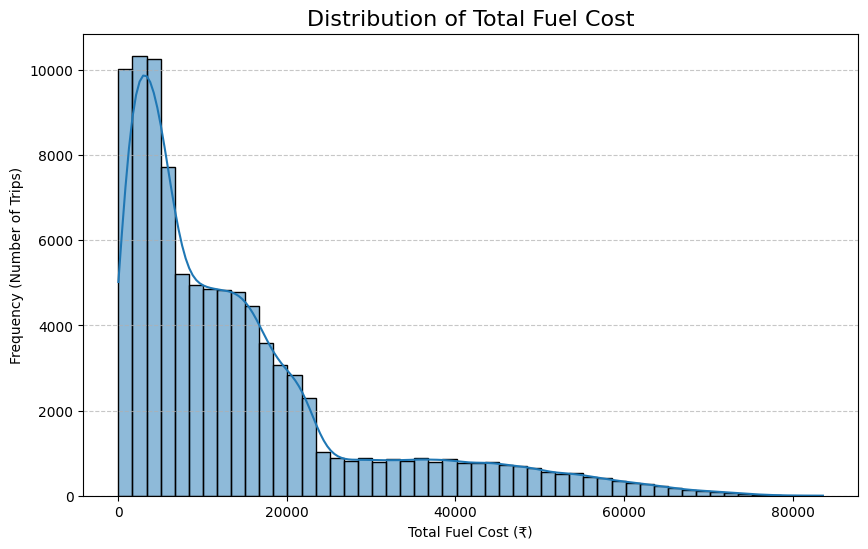

EDA Plot 1: Distribution of Total Fuel Cost (Histogram)


In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Fuel_Cost'], kde=True, bins=50)
plt.title('Distribution of Total Fuel Cost', fontsize=16)
plt.xlabel('Total Fuel Cost (₹)')
plt.ylabel('Frequency (Number of Trips)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("EDA Plot 1: Distribution of Total Fuel Cost (Histogram)")

/Users/shashanksingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


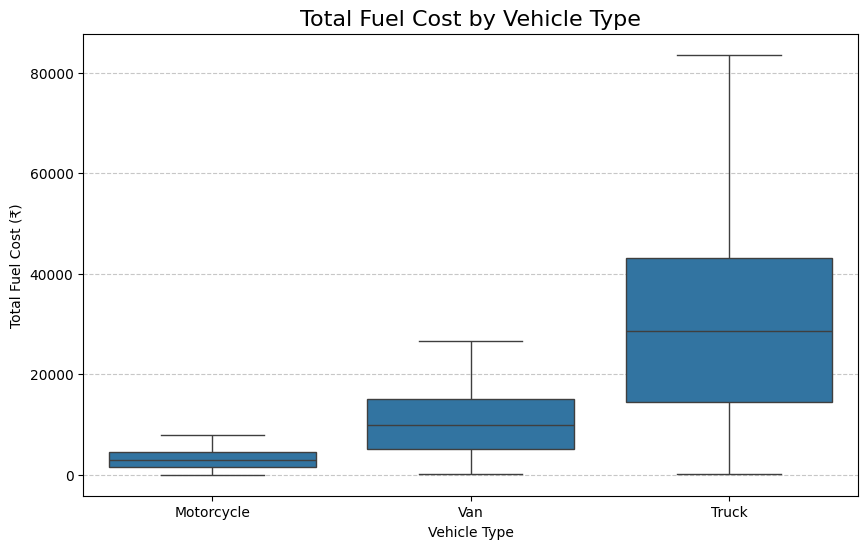

EDA Plot 2: Cost by Vehicle Type (Boxplot)


In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Vehicle_Type', y='Total_Fuel_Cost', 
            order=['Motorcycle', 'Van', 'Truck']) # Order them logically
plt.title('Total Fuel Cost by Vehicle Type', fontsize=16)
plt.xlabel('Vehicle Type')
plt.ylabel('Total Fuel Cost (₹)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("EDA Plot 2: Cost by Vehicle Type (Boxplot)")

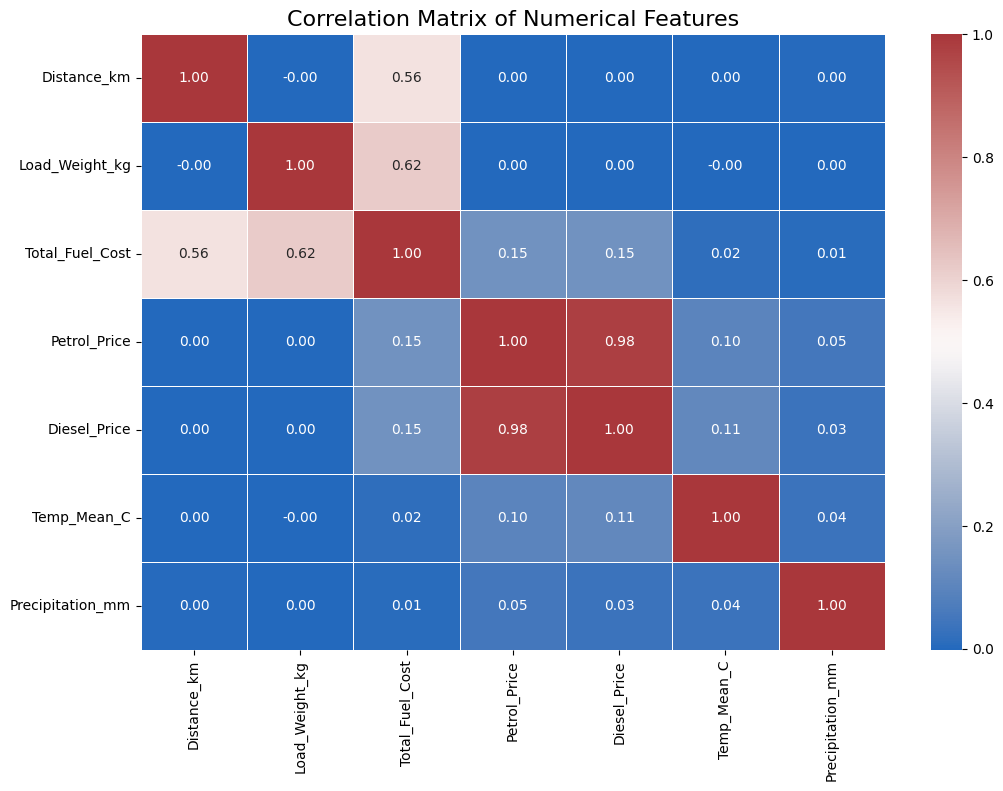

EDA Plot 4: Correlation Heatmap


In [6]:
numerical_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='vlag', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()
print("EDA Plot 4: Correlation Heatmap")

In [7]:
y = df['Total_Fuel_Cost']
X = df.drop(['Total_Fuel_Cost', 'Trip_ID','Date'], axis=1)
categorical_features = ['City', 'Vehicle_Type', 'Fuel_Type', 'Route']
numerical_features = X.drop(columns=categorical_features).columns

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ]
)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [10]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

In [11]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.4f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): ₹{mae:.2f}")

R-squared (R²): 0.9997
Mean Absolute Error (MAE): ₹92.76


In [13]:
print("\n--- Example Prediction ---")
X_sample = X_test.iloc[5] 
y_actual = y_test.iloc[5]
y_sample_pred = model.predict(X_sample.to_frame().T)[0]

print(f"Trip Details: \n{X_sample}\n")
print(f"Actual Cost:    ₹{y_actual:.2f}")
print(f"Predicted Cost: ₹{y_sample_pred:.2f}")


--- Example Prediction ---
Trip Details: 
City                 Mumbai
Vehicle_Type            Van
Fuel_Type            Diesel
Route               Route_A
Distance_km          757.57
Load_Weight_kg       336.09
Petrol_Price          77.51
Diesel_Price          60.44
Temp_Mean_C            28.6
Precipitation_mm        0.0
Name: 93021, dtype: object

Actual Cost:    ₹3826.34
Predicted Cost: ₹3853.96


In [14]:
import joblib
joblib.dump(model, 'Regression_model.pkl')

['Regression_model.pkl']